In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

In [3]:
def generateDataFromGMM(N,alpha,Mu,Sigma):
    # Generates N vector samples from the specified mixture of Gaussians
    # Returns samples and their component labels
    # Data dimensionality is determined by the size of mu/Sigma parameters
    
    n = len(Mu[:,0]); # Data dimensionality
    C = len(alpha); # Number of components
    x = np.zeros((n,N)); 
    labels = np.zeros((1,N)); 
    # Decide randomly which samples will come from each component
    u = np.random.random((1,N)); 
    thresholds = np.cumsum(alpha);
    for i in range(0,C):
        # indl = (t for t in enumerate(int(u[0,:])) if t<= thresholds[i]);
        indl = np.argwhere(u[0,:] <= thresholds[i])
        Nl = len(indl);
        labels[0,indl[:,0]] = i*np.ones((Nl));
        u[0,indl[:,0]] = 1.1*np.ones((Nl)); # these samples should not be used again
        x[:,indl[:,0]] = np.transpose(np.random.multivariate_normal(Mu[i,:],Sigma[i,:,:],Nl));
    
    return x

In [2]:
#---- Calculate class pdf ----#
def evalGaussian(x, Mu, Sigma):
    g=multivariate_normal.pdf(x,Mu,Sigma);
    return g

In [6]:
Figure_COUNT=1
Figure_COUNT=Figure_COUNT+20
#------------ Setup the Given vectors and matrices ----------#

## Number of samples and dimensions ##
n= 2; #Number of dimensions
# N= 500; #Number of samples simulated
N_Validate=20000;
C= 2; #Number of classes
##----------------------------------##

## Class means and covariance ##
Sigma_0=np.zeros((2,n,n));
Sigma_0[0,:,:]=np.array([[4, 0],
                            [0, 4]])
Sigma_0[1,:,:]=np.array([[1, 0],
                            [0, 3]])
Mu_0=np.zeros((2,n))
Mu_0[0,:]=np.array([5,  0])
Mu_0[1,:]=np.array([0,  4])
Weight=[0.5,0.5]

Sigma_1=np.zeros((n,n));
Sigma_1=np.array([[2, 0],
                    [0, 2]])
Mu_1=np.zeros((1,n))
Mu_1[0,:]=np.array([3,  2])
##----------------------------##

## Class priors ##
p=np.array([0.6, 0.4]); #p[0]=class 0 prior, p[1]=class 1 prior
##--------------##
#--- Generate Validate Dataset based on class conditional pdfs ## 
N_random_numbers_Validate=np.random.random(N_Validate);
label_Validate=np.zeros(N_Validate);
X_Validate = np.zeros((n, N_Validate))
L_Counter_Validate=np.zeros(C);
Data_Set_L_Validate=np.zeros((C,N_Validate,n))
Sum_CL_Validate=np.zeros(C)

for i in range(0,N_Validate):
    if N_random_numbers_Validate[i]<=p[0]:
        label_Validate[i]=0;
    else:
        label_Validate[i]=1;
for i in range(0,C):      
    Sum_CL_Validate[i]=sum(label_Validate==i); #Number of data points with the given class label

Data_Set_L_Validate[0,0:int(Sum_CL_Validate[0]),:]= np.transpose(generateDataFromGMM(int(Sum_CL_Validate[0]),Weight,Mu_0[:,:],Sigma_0[:,:,:]))
Data_Set_L_Validate[1,0:int(Sum_CL_Validate[1]),:]= (np.random.multivariate_normal(Mu_1[0,:],Sigma_1[:,:],int(Sum_CL_Validate[1])))
for i in range(0,N_Validate):
    for CLASS in range(0,C):
        if label_Validate[i]==CLASS:
            X_Validate[:,i]= np.transpose(Data_Set_L_Validate[CLASS,int(L_Counter_Validate[CLASS]),:]);
            L_Counter_Validate[CLASS]=L_Counter_Validate[CLASS]+1;

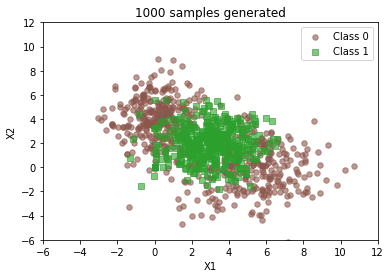

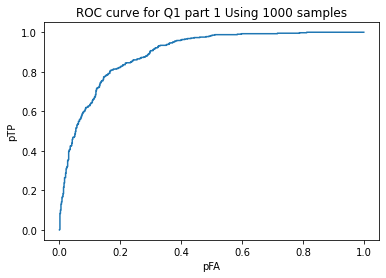

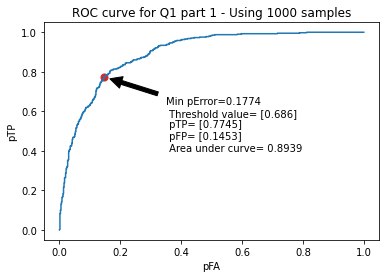

Finished Q1 part 1


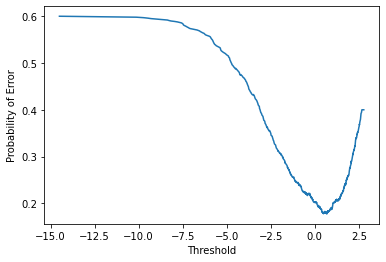

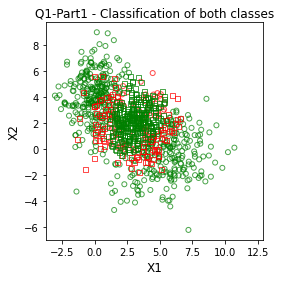

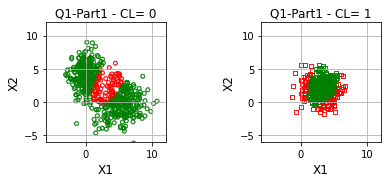

In [9]:
################################################################
#                  Question 1 - Part 1                         #
################################################################ 

#--- Loop through training datasets
N=1000

#--- Generate Training Dataset based on class conditional pdfs ## 
N_random_numbers=np.random.random(N);
label=np.zeros(N);
X = np.zeros((n, N))
L_Counter=np.zeros(C);
Sum_CL=np.zeros(C)  

for i in range(0,N):
    if N_random_numbers[i]<=p[0]:
        label[i]=0;
    else:
        label[i]=1;
for i in range(0,C):      
    Sum_CL[i]=sum(label==i); #Number of data points with the given class label

Data_Set_L=np.zeros((C,N,n))
Data_Set_L[0,0:int(Sum_CL[0]),:]= np.transpose(generateDataFromGMM(int(Sum_CL[0]),Weight,Mu_0[:,:],Sigma_0[:,:,:]))
Data_Set_L[1,0:int(Sum_CL[1]),:]= (np.random.multivariate_normal(Mu_1[0,:],Sigma_1[:,:],int(Sum_CL[1])))
for i in range(0,N):
    for CLASS in range(0,C):
        if label[i]==CLASS:
            X[:,i]= np.transpose(Data_Set_L[CLASS,int(L_Counter[CLASS]),:]);
            L_Counter[CLASS]=L_Counter[CLASS]+1;
        
Fig_Num=Figure_COUNT;
Up_Lim=12;
Low_Lim=-6;

fig=plt.figure(Fig_Num)
m=['o','s']
plt.scatter(Data_Set_L[0,:,0], Data_Set_L[0,:,1], c='#8c564b', marker=m[0], s=30, alpha=0.6)
plt.scatter(Data_Set_L[1,:,0], Data_Set_L[1,:,1], c='#2ca02c', marker=m[1], s=30, alpha=0.6)
plt.legend(['Class 0', 'Class 1'])
plt.title(str(N)+" samples generated")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim((Low_Lim, Up_Lim))
plt.ylim((Low_Lim, Up_Lim))
#---------- END Setup the Given vectors and matrices --------#

#Define Loss Matrix
lossMatrix= np.ones(C)-np.identity(C);



pxgivenL=np.zeros((C,N))
for j in range(0,N):
    pxgivenL[0,j] = Weight[0]*(evalGaussian(X[:,j],Mu_0[0,:],Sigma_0[0,:,:]))+Weight[1]*(evalGaussian(X[:,j],Mu_0[1,:],Sigma_0[1,:,:])) #Evaluate p(x|L=0)
    pxgivenL[1,j] = evalGaussian(X[:,j],Mu_1[0,:],Sigma_1[:,:])#Evaluate p(x|L=1)
#- END Calculate class pdf --#

#---- Calculate Discriminant Score ----#
discriminantScore=np.zeros(N);
for i in range(0,N):
        discriminantScore[i] = math.log(pxgivenL[1,i])-math.log(pxgivenL[0,i]); # If discriminantScore > gamma, D=1, otherwise, D=0
#- END Calculate Discriminant Score --#
gamma = np.sort(discriminantScore);
eps=0.1;
mid_gamma=np.zeros(N);
mid_gamma[0]=gamma[0]-eps;
mid_gamma[N-1]=gamma[N-1]+eps;
for i in range(1,N-1):
    mid_gamma[i]=(gamma[i-1]+gamma[i])/2;

SZ= np.size(mid_gamma);
pTN=np.zeros(SZ);
pFN=np.zeros(SZ);
pTP=np.zeros(SZ);
pFP=np.zeros(SZ);

for i in range(0,SZ):
    Decision=np.zeros(N);
    TP = np.zeros(1); #Number of Correct Decisions/ True Positive
    FP =np.zeros(1); #Number of False Alarms/False Positive
    TN=np.zeros(1); #Number of True Negatives
    FN=np.zeros(1); #Number of False Negatives
    for j in range(0,N):
        Decision[j]=(discriminantScore[j]>=mid_gamma[i]);
        if Decision[j]==1 and label[j]==1:
            TP = TP+1;
        elif  Decision[j]==1 and label[j]==0:
                FP=FP+1;
        elif  Decision[j]==0 and label[j]==0:
                TN=TN+1;
        else:  
                FN=FN+1;

    pFP[i]=FP/Sum_CL[0];
    pTP[i]=TP/Sum_CL[1];
    pFN[i]=FN/Sum_CL[1];
    pTN[i]=TN/Sum_CL[0];
    
Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)
plt.plot(pFP,pTP)
plt.xlabel("pFA")
plt.ylabel("pTP")
plt.title("ROC curve for Q1 part 1 Using "+str(N)+" samples")
plt.show()

## Calculate area under ROC curve
Flip_pTP=np.flip(pTP);
Flip_pFP=np.flip(pFP);
Area_Q1_P1=0;
for i in range(1,N):
    Area_Q1_P1= Area_Q1_P1 + Flip_pTP[i]*(Flip_pFP[i]-Flip_pFP[i-1]);

#Calculate  the  probability of error as a function of gamma
P_Err=np.zeros(SZ);
for i in range(0,SZ):
    P_Err[i]=pFP[i]*p[0]+pFN[i]*p[1];
    
Min_P_Err=min(P_Err);
Min_P_Err_ind = [i for i, v in enumerate(P_Err) if v == Min_P_Err];
Best_Gamma=mid_gamma[Min_P_Err_ind];

Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)
plt.plot(pFP,pTP)
plt.xlabel("pFA")
plt.ylabel("pTP")
plt.title("ROC curve for Q1 part 1 - Using "+str(N)+" samples")
plt.scatter(pFP[Min_P_Err_ind],pTP[Min_P_Err_ind],50,'#d62728')
TEXT= "Min pError="+str(np.round(Min_P_Err,4))+"\n Threshold value= "+str(np.round(Best_Gamma,4))+"\n pTP= "+str(np.round(pTP[Min_P_Err_ind],4))+"\n pFP= "+str(np.round(pFP[Min_P_Err_ind],4))+"\n Area under curve= "+str(np.round(Area_Q1_P1,4))
plt.annotate(TEXT, xy=(pFP[Min_P_Err_ind], pTP[Min_P_Err_ind]), xytext=(0.35, 0.4),arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)
plt.plot(mid_gamma,P_Err)
plt.xlabel("Threshold")
plt.ylabel("Probability of Error")

Color=[]
COLOR_L0=[]
COLOR_L1=[]
Indeces_L0=np.zeros(int(Sum_CL[0]),dtype=int); #Contains the index numbers of Dataset X that has label 1
Indeces_L1=np.zeros(int(Sum_CL[1]),dtype=int);
L_Counter=np.zeros(C,dtype=int);
for i in range(0,N):
    Decision[i]=discriminantScore[i]>=Best_Gamma
    if Decision[i]==label[i]:
        Color.append('green');
    else:
        Color.append('red');
    if label[i]==0:
        Indeces_L0[L_Counter[0]]=i;
        L_Counter[0]=L_Counter[0]+1;
        COLOR_L0.append(Color[i]);
    elif label[i]==1:
        Indeces_L1[L_Counter[1]]=i;
        L_Counter[1]=L_Counter[1]+1;
        COLOR_L1.append(Color[i]);

            
Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)     

plt.scatter(X[0,Indeces_L0],X[1,Indeces_L0],facecolors='none', edgecolors=COLOR_L0,marker=m[0], s=25, alpha=0.7)
plt.scatter(X[0,Indeces_L1],X[1,Indeces_L1],facecolors='none', edgecolors=COLOR_L1,marker=m[1], s=25, alpha=0.7)
plt.title('Q1-Part1 - Classification of both classes')
plt.xlabel('X1',fontsize=12)
plt.ylabel('X2',fontsize=12)
plt.xlim((Low_Lim, Up_Lim))
plt.ylim((Low_Lim, Up_Lim))
plt.axis('square')
    
Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)
plt.title("Classification")
plt.subplots_adjust(hspace=0.8, wspace=0.8)
for i in range(0,C):
    if i==0:
        SUBPLOT=1;
        Scat_Color=COLOR_L0
        Scat_Indeces=Indeces_L0
        Marker=m[0]
    else:
        SUBPLOT=2;
        Scat_Color=COLOR_L1
        Scat_Indeces=Indeces_L1
        Marker=m[1]
        
    plt.subplot(1,2,SUBPLOT)
    plt.title("Q1-Part1 - CL= "+str(int(i)))
    plt.scatter(X[0,Scat_Indeces],X[1,Scat_Indeces],facecolors='none', edgecolors=Scat_Color,marker=Marker, s=15, alpha=0.7)
    plt.xlabel('X1',fontsize=12)
    plt.ylabel('X2',fontsize=12)
    plt.axis('square')
    plt.xlim((Low_Lim, Up_Lim))
    plt.ylim((Low_Lim, Up_Lim))
    plt.grid(visible=True,which='both',axis='both')
    
    plt.subplot(1,2,SUBPLOT)
    plt.title("Q1-Part1 - CL= "+str(int(i)))
    plt.scatter(X[0,Scat_Indeces],X[1,Scat_Indeces],facecolors='none', edgecolors=Scat_Color,marker=Marker, s=15, alpha=0.7)
    plt.xlabel('X1',fontsize=12)
    plt.ylabel('X2',fontsize=12)
    plt.axis('square')
    plt.xlim((Low_Lim, Up_Lim))
    plt.ylim((Low_Lim, Up_Lim))
    plt.grid(visible=True,which='both',axis='both')

print("Finished Q1 part 1")




In [10]:
################################################################
#                  Question 1 - Part 2                         #
################################################################ 

print("Begin Q1 part 2")

#---EM For GMM---#
Est_Sigma_0=np.zeros((2,n,n));
Est_Mu_0=np.zeros((2,n))
gmm_0=GaussianMixture(2,covariance_type='full')
Best_gmm_0=gmm_0.fit(np.transpose(X[:,Indeces_L0]))
Est_Mu_0=Best_gmm_0.means_
Est_Sigma_0=Best_gmm_0.covariances_
Est_Weight=Best_gmm_0.weights_

Est_Sigma_1=np.zeros((n,n));
Est_Mu_1=np.zeros((1,n))
gmm_1=GaussianMixture(1,covariance_type='full')
Best_gmm_1=gmm_1.fit(np.transpose(X[:,Indeces_L1]))
Est_Mu_1=Best_gmm_1.means_
Est_Sigma_1=Best_gmm_1.covariances_

#--END EM For GMM---#

Begin Q1 part 2


c:\Users\meuli\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [11]:
#---- Calculate class pdf ----#
Est_pxgivenL=np.zeros((C,N_Validate))
for j in range(0,N_Validate):
    Est_pxgivenL[0,j] = Est_Weight[0]*(evalGaussian(X_Validate[:,j],Est_Mu_0[0,:],Est_Sigma_0[0,:,:]))+Est_Weight[1]*(evalGaussian(X_Validate[:,j],Est_Mu_0[1,:],Est_Sigma_0[1,:,:])) #Evaluate p(x|L=0)
    Est_pxgivenL[1,j] = evalGaussian(X_Validate[:,j],Est_Mu_1[0,:],Est_Sigma_1[0,:,:])#Evaluate p(x|L=1)
#- END Calculate class pdf --#

#---- Calculate Discriminant Score ----#
Est_discriminantScore=np.zeros(N_Validate);

for i in range(0,N_Validate):
        Est_discriminantScore[i] = math.log(Est_pxgivenL[1,i])-math.log(Est_pxgivenL[0,i]);
        # If discriminantScore > gamma, D=1, otherwise, D=0
#- END Calculate Discriminant Score --#

In [12]:
Est_gamma = np.sort(Est_discriminantScore);
eps=0.1;
Est_mid_gamma=np.zeros(N_Validate);
Est_mid_gamma[0]=Est_gamma[0]-eps;
Est_mid_gamma[N_Validate-1]=Est_gamma[N_Validate-1]+eps;
for i in range(1,N_Validate-1):
    Est_mid_gamma[i]=(Est_gamma[i-1]+Est_gamma[i])/2;

SZ= np.size(Est_mid_gamma);
Est_pTN=np.zeros(SZ);
Est_pFN=np.zeros(SZ);
Est_pTP=np.zeros(SZ);
Est_pFP=np.zeros(SZ);

for i in range(0,SZ):
    Est_Decision=np.zeros(N_Validate);
    TP = np.zeros(1); #Number of Correct Decisions/ True Positive
    FP =np.zeros(1); #Number of False Alarms/False Positive
    TN=np.zeros(1); #Number of True Negatives
    FN=np.zeros(1); #Number of False Negatives
    for j in range(0,N_Validate):
        Est_Decision[j]=(Est_discriminantScore[j]>=Est_mid_gamma[i]);
        if Est_Decision[j]==1 and label_Validate[j]==1:
            TP = TP+1;
        elif  Est_Decision[j]==1 and label_Validate[j]==0:
                FP=FP+1;
        elif  Est_Decision[j]==0 and label_Validate[j]==0:
                TN=TN+1;
        else:  
                FN=FN+1;

    Est_pFP[i]=FP/Sum_CL_Validate[0];
    Est_pTP[i]=TP/Sum_CL_Validate[1];
    Est_pFN[i]=FN/Sum_CL_Validate[1];
    Est_pTN[i]=TN/Sum_CL_Validate[0];
    
Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)
plt.plot(Est_pFP,Est_pTP)
plt.xlabel("pFA")
plt.ylabel("pTP")
plt.title("ROC curve for Q1 part 2 - Using Estimated pdfs - "+str(N)+" training samples")
plt.show()

## Calculate area under ROC curve
Flip_Est_pTP=np.flip(Est_pTP);
Flip_Est_pFP=np.flip(Est_pFP);
Area_Q1_P2=0;
for i in range(1,N_Validate):
    Area_Q1_P2= Area_Q1_P2 + Flip_Est_pTP[i]*(Flip_Est_pFP[i]-Flip_Est_pFP[i-1]);
print("Area under ROC curve for Q1 part 2 is: "+str(Area_Q1_P2)+" Using "+str(N)+" training samples")

#Calculate  the  probability of error as a function of gamma
Est_P_Err=np.zeros(SZ);
for i in range(0,SZ):
    Est_P_Err[i]=Est_pFP[i]*p[0]+Est_pFN[i]*p[1];
    
Est_Min_P_Err=min(Est_P_Err);
Est_Min_P_Err_ind = [i for i, v in enumerate(Est_P_Err) if v == Est_Min_P_Err];
Est_Best_Gamma=Est_mid_gamma[Est_Min_P_Err_ind];

Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)
plt.plot(Est_pFP,Est_pTP)
plt.xlabel("pFA")
plt.ylabel("pTP")
plt.title("ROC curve for Q1 part 2 Using "+str(N)+" training samples")
plt.scatter(Est_pFP[Est_Min_P_Err_ind],Est_pTP[Est_Min_P_Err_ind],50,'#d62728')
TEXT= "Min pError="+str(np.round(Est_Min_P_Err,4))+"\n Threshold value= "+str(np.round(Est_Best_Gamma,4))+"\n pTP= "+str(np.round(Est_pTP[Est_Min_P_Err_ind],4))+"\n pFP= "+str(np.round(Est_pFP[Est_Min_P_Err_ind],4))+"\n Area under curve= "+str(np.round(Area_Q1_P2,4))
plt.annotate(TEXT, xy=(Est_pFP[Est_Min_P_Err_ind], Est_pTP[Est_Min_P_Err_ind]), xytext=(0.35, 0.4),arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)
plt.plot(Est_mid_gamma,Est_P_Err)
plt.xlabel("Threshold")
plt.ylabel("Probability of Error")

Est_Color=[]
Est_COLOR_L0=[]
Est_COLOR_L1=[]
Est_Indeces_L0=np.zeros(int(Sum_CL_Validate[0]),dtype=int); #Contains the index numbers of Dataset X that has label 1
Est_Indeces_L1=np.zeros(int(Sum_CL_Validate[1]),dtype=int);
Est_L_Counter=np.zeros(C,dtype=int);

for i in range(0,N_Validate):
    Est_Decision[i]=Est_discriminantScore[i]>=Est_Best_Gamma
    if Est_Decision[i]==label_Validate[i]:
        Est_Color.append('green');
    else:
        Est_Color.append('red');
    if label_Validate[i]==0:
        Est_COLOR_L0.append(Est_Color[i]);
        Est_Indeces_L0[Est_L_Counter[0]]=i;
        Est_L_Counter[0]=Est_L_Counter[0]+1;
    elif label_Validate[i]==1:
        Est_COLOR_L1.append(Est_Color[i]);
        Est_Indeces_L1[Est_L_Counter[1]]=i;
        Est_L_Counter[1]=Est_L_Counter[1]+1;
            
Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)     

plt.scatter(X_Validate[0,Est_Indeces_L0],X_Validate[1,Est_Indeces_L0],facecolors='none', edgecolors=Est_COLOR_L0,marker=m[0], s=25, alpha=0.7)
plt.scatter(X_Validate[0,Est_Indeces_L1],X_Validate[1,Est_Indeces_L1],facecolors='none', edgecolors=Est_COLOR_L1,marker=m[1], s=25, alpha=0.7)
plt.title("Q1-Part2 - Classification of both classes Using "+str(N)+" training samples")
plt.xlabel('X1',fontsize=12)
plt.ylabel('X2',fontsize=12)
plt.xlim((Low_Lim, Up_Lim))
plt.ylim((Low_Lim, Up_Lim))
plt.axis('square')
    
Fig_Num=Fig_Num+1;
plt.figure(Fig_Num)
plt.title("Q1-Part2 - Classification Using "+str(N)+" training samples")
plt.subplots_adjust(hspace=0.8, wspace=0.8)
for i in range(0,C):
    if i==0:
        SUBPLOT=1;
        Est_Scat_Color=Est_COLOR_L0
        Scat_Indeces=Est_Indeces_L0
        Marker=m[0]
    else:
        SUBPLOT=2;
        Est_Scat_Color=Est_COLOR_L1
        Scat_Indeces=Est_Indeces_L1
        Marker=m[1]
        
    plt.subplot(1,2,SUBPLOT)
    plt.title("Q1-Part2 - CL= "+str(int(i)))
    plt.scatter(X_Validate[0,Scat_Indeces],X_Validate[1,Scat_Indeces],facecolors='none', edgecolors=Est_Scat_Color,marker=Marker, s=15, alpha=0.7)
    plt.xlabel('X1',fontsize=12)
    plt.ylabel('X2',fontsize=12)
    plt.axis('square')
    plt.xlim((Low_Lim, Up_Lim))
    plt.ylim((Low_Lim, Up_Lim))
    plt.grid(b=True,which='both',axis='both')
    
    plt.subplot(1,2,SUBPLOT)
    plt.title("Q1-Part2 - CL= "+str(int(i)))
    plt.scatter(X_Validate[0,Scat_Indeces],X_Validate[1,Scat_Indeces],facecolors='none', edgecolors=Est_Scat_Color,marker=Marker, s=15, alpha=0.7)
    plt.xlabel('X1',fontsize=12)
    plt.ylabel('X2',fontsize=12)
    plt.axis('square')
    plt.xlim((Low_Lim, Up_Lim))
    plt.ylim((Low_Lim, Up_Lim))
    plt.grid(b=True,which='both',axis='both')

print("Finished Q1 part 2")








KeyboardInterrupt: 